In [3]:
%run init_notebook.py 
from settings import *

In [4]:
%matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy import stats, optimize

plot_defaults = {
    'figure.figsize':(14,4),
    'figure.facecolor':'white',
    'axes.grid':True,
    'grid.linewidth':0.5,
    'grid.linestyle':'--',
    'axes.spines.top':False,
    'axes.spines.bottom':False,
    'axes.spines.left':False,
    'axes.spines.right':False
}

plt.rcParams.update(plot_defaults)

# Distributions in Python

Up until now we've used `np.random.default_rng` to make random numbers. This is nice if all we want to do is sample, but if we want more functionality we can use `scipy.stats`.

In [5]:
d = stats.norm(loc=0, scale=1.5)

In [6]:
d

In [7]:
d.mean()

0.0

In [8]:
d.std()

1.5

In [9]:
d.var()

2.25

In [10]:
d.rvs(10)

array([-2.97998738,  0.74020301, -0.70905495, -0.55526321, -3.49558428,
        1.07040552, -0.13438912, -0.98611285, -0.43757112,  0.61906464])

## Assignment 1

Draw 500 random values from a `scipy.normal` distribution with mean 1 and standard deviation 2. Make a histogram of the sample with 50 bins.

In [11]:
## YOUR CODE HERE

## Probability Distribution Function (PDF)

The PDF of a distribution maps values on the **support** to values in $\mathcal R$. The output gives a relative likelihood of observing this value from the distribution. Note that it is *not* a probability, because continuous distributions cannot assign probabilities to a single value. 

What is true is that *ranges* of values on the support are probabilities, and that the PDF integrates to 1.  

In [12]:
d.pdf(1)

0.2129653370149015

You can also ask for a range of values at the same time.

In [13]:
d.pdf(np.arange(-3,3))

array([0.03599398, 0.10934005, 0.21296534, 0.26596152, 0.21296534,
       0.10934005])

## Assignment 2:

Use `np.linspace` to make an array of 100 numbers, evenly spaced, between -5 and 5. Save it as a variable. Compute the PDF of a Normal(0, 1.5) distribution for these values. Make a line plot, where the x-axis has the `linspace` variable, and the y-axis has the PDF of the linspace.

On the sample plot, plot a histogram of 500 draws from the Normal(0, 1.5). 

In [14]:
# To see the documentation for np.linspace, uncomment the next line and run the cell
# np.linspace??

## Joint Probabilities

You might recall from the summer refresher (or before!) that the *joint* probability of many events can be written as the product of the individual events:

$$P(\{X\}_{i=0}^N) = \prod_{i=0}^N p(x_i)$$

Therefore if we have a bunch of data that we think came from one distribution, we can compute the PDF for each individual point, then multiply them all together.

In [15]:
d = stats.norm(0, 1.5)
data = d.rvs(50)

In [16]:
p_data = d.pdf(data).prod()
p_data

1.676474331430715e-39

As you can see this is a very small number. If we have too much data, this can quickly become a number too small for the computer to represent, and it will be rounded to zero. This is known as **floating point imprecision**.

In [17]:
data = d.rvs(500)
d.pdf(data).prod()

0.0

To combat this, it is very common in statistical computing to use the *log* of the PDF instead of the pdf itself. The log PDF is built into the scipy distribution as `d.logpdf`. The joint log probability will be :

$$\log P(\{X\}_{i=0}^N) = \sum_{i=0}^N \log p(x_i)$$


In [18]:
d.logpdf(data).sum()

-904.6181531555924

## Assignment 3

Plot the log probability for a Normal(0, 1.5) of 250 evenly spaced values between -5 and 5 (use `np.linspace`). Make a line plot of the gridpoints and their log probability. Make this line blue, and add a label.

On a second axis, plot the probability for the same gridpoints and the same distribution. Make this line orange and add a label.

Comment on the resulting plot.

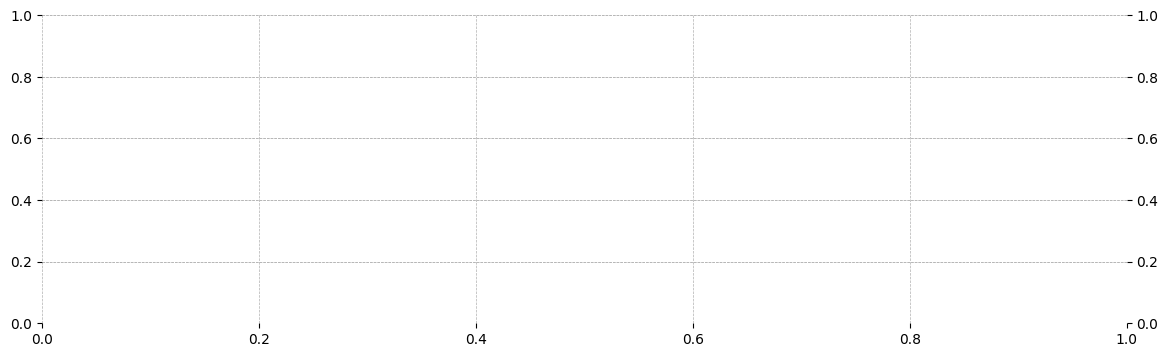

In [19]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

## YOUR CODE HERE

# Likelihood

So far we have looked at the probability density of data. That is, we have kept the parameters of the distribution constant and varied the data. Often, however, we are interesting in estimating where some fixed data came from. For this, we turn to the **likelihood**.

The Likelihood function is exactly identical to the probability distribution function! The difference is that we hold the data fixed, and we allow the parameters to vary.

Because of this difference, the likelihood function is **not** a valid probability distribution! It does not integrate to 1.

To see a likelihood function, we can fix the standard deviation of a distribution at the true value and use a loop over values of the mean

In [ ]:
rng = np.random.default_rng(1776)
true_mean = rng.normal()
data = rng.normal(loc=true_mean, scale=3.0, size=500)

## Assignment 4

As with the PDF, we will usually work with log likelihoods instead of likelihoods, to prevent floating point errors. Fill in the following code to compute the log likelihood for each value in `means`. Plot the results.

In [ ]:
means = np.linspace(-2, 2, 100)
log_likelihoods = []

for mean in means:
    log_likelihood = # YOUR CODE HERE
    log_likelihoods.append(log_likelihood)
log_likelihoods = np.array(log_likelihoods)

In [ ]:
## PLOTTING CODE GOES HERE

We can get the maximum value of `log_likelihood` by using `np.argmax`. This returns the array index that contains the largest value. We can then ask for this index in `means` to see what mean is associated with the largest log-likelihood

**Question**: Is maximizing the log likelihood the same thing is maximizing the likelihood, or do we need to make some adjustments?

In [ ]:
best_ll_idx = np.argmax(log_likelihoods)
mean_mle = means[best_ll_idx]
print(mean_mle)
print(true_mean)

It turns out that for a normal distribution, the maximum likelihood estimatior is just the mean of the data, so we can check that too.


In [ ]:
data.mean()

## Assignment 5

Next, we will use maximum likelihood to estimate two parameters, the unknown mean and standard deviation of a Normal distribution.

Use code like that above, but you will now need two loops. I've gotten you started.

In [ ]:
true_mean = rng.normal()
true_std  = np.abs(rng.normal()) # Must be positive!
data = np.random.normal(loc=true_mean, scale=true_std, size=500)

means = np.linspace(-2, 2, 100)
stds = np.linspace(1e-4, 2, 100)

log_likelihoods = np.zeros((100, 100))

for i, mean in enumerate(means):
    for j, std in enumerate(stds):
        ll = #YOUR CODE HERE
        log_likelihoods[i, j] = ll

`np.argmax` cannot handle 2d arrays. Instead, we will have to use `np.where` to ask for the coordinates where `log_likelihoods == max(log_likelihoods)`.

In [ ]:
best_mean_idx, best_std_idx = np.where(log_likelihoods == np.amax(log_likelihoods))
mean_mle = means[best_mean_idx]
std_mle = stds[best_std_idx]

In [ ]:
print(mean_mle)
print(true_mean)

print(std_mle)
print(true_std)

## A better way

Looping over the variables and saving the results is called a **grid search**. This is the most brute-force way to solve a problem in computing. There is almost always a better way. 

`scipy.optimize` offers many optimization algorithms that allow us to quickly find the minimum of a function of interest. It only does minimums, so if we want the maximum, we will have to instead minimize the negative of the target function.

## Assignment 6

Fill in the code below to finish a helper function that will compute the negative log-likelihood of data given parameters. 

In [ ]:
def negative_ll(params, data):
    loc, scale = params
#     d = # YOUR CODE HERE
#     ll = # YOUR CODE HERE
        
    return -ll

In [ ]:
optimize.minimize(fun=negative_ll, 
                  x0=np.array([0.8, 0.8]),
                  args=(data),
                  bounds=[(None, None), (1e-4, None)])


# Bonus: OLS is Maximum Likelihood 

You've probably seen the analyic solution to OLS in econometrics class:

$$ \hat{\beta} = (X^T X)^{-1} X^T y$$

And indeed you can use this to directly get estimated parameters. But you can also do it by computing the maximum likelihood for $\beta$ and $\sigma$ of a normal distribution $N(X \beta, \sigma)$. 

In [ ]:
from sklearn.datasets import make_regression

intercept = rng.normal(loc=10, scale=10)
true_std = np.abs(rng.normal(loc=0, scale=10))

X, y, true_coefs = make_regression(n_samples=100, n_features=3, n_informative=3, bias=intercept, noise=true_std, coef=True)

true_coefs = np.r_[intercept, true_coefs, true_std]
# Add a column of ones
X = np.c_[np.ones(X.shape[0]), X]

In [ ]:
def neg_loglike_OLS(params, X, y):
    # assume std is the last param, all others are beta
    beta = params[:-1]
    std = params[-1]
    
    mu_hat = X @ beta
    ll = stats.norm(loc=mu_hat, scale=std).logpdf(y).sum()
    
    return -ll

In [ ]:
k = X.shape[1] #number of columns

bounds = [(None, None)] * k # beta values can be anything
bounds += [(1e-4, None)] # std must be positive and non-zero

optimize.minimize(fun=neg_loglike_OLS,
                  x0 = np.full(k+1, 0.8), # start the optimization at 0.8, why not?,
                  args=(X, y),
                  bounds=bounds)

In [ ]:
true_coefs